## Importing necessary libraries:-

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

import warnings 
warnings.filterwarnings(action = 'ignore')

In [2]:
forest_data = pd.read_csv('forestfires.csv')
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## Exploratory Data Analysis:-

In [3]:
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
forest_data.shape

(517, 31)

In [5]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

##### No null entries/values in the dataset.

### Plotting the Graph:-

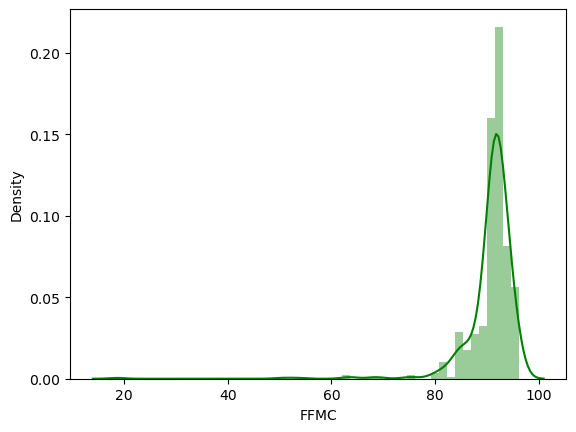

In [6]:
sns.distplot(forest_data['FFMC'], color = 'green')
plt.show()

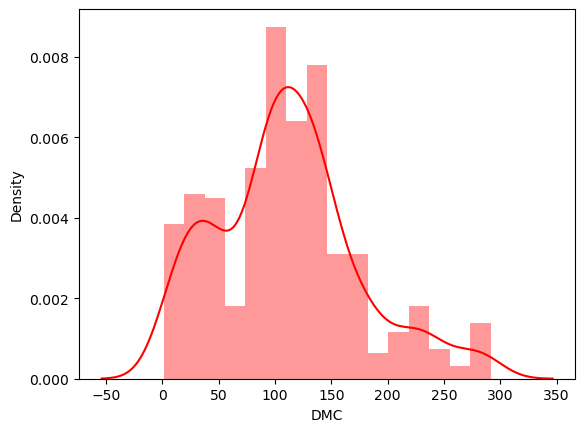

In [7]:
sns.distplot(forest_data['DMC'], color = 'red')
plt.show()

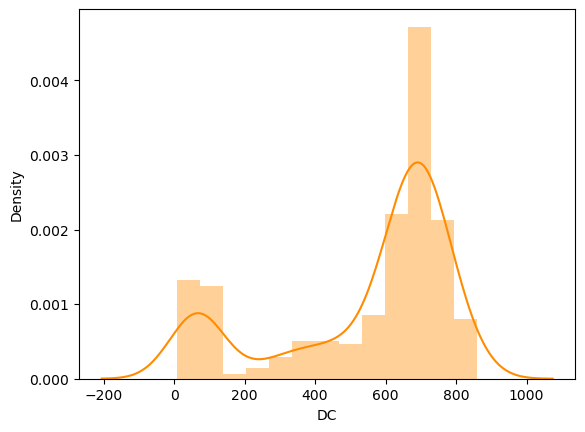

In [8]:
sns.distplot(forest_data['DC'], color = 'darkorange')
plt.show()

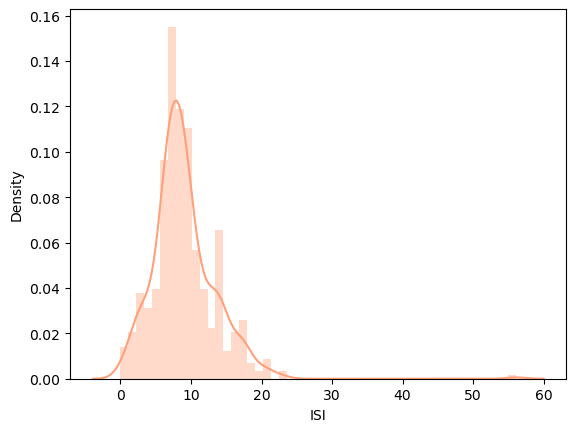

In [10]:
sns.distplot(forest_data['ISI'], color = 'lightsalmon')
plt.show()

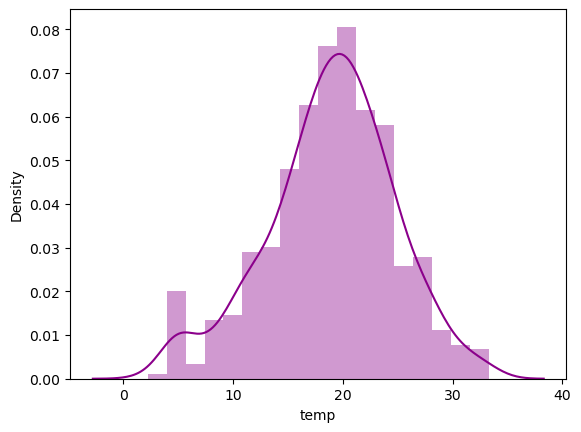

In [11]:
sns.distplot(forest_data['temp'], color = 'darkmagenta')
plt.show()

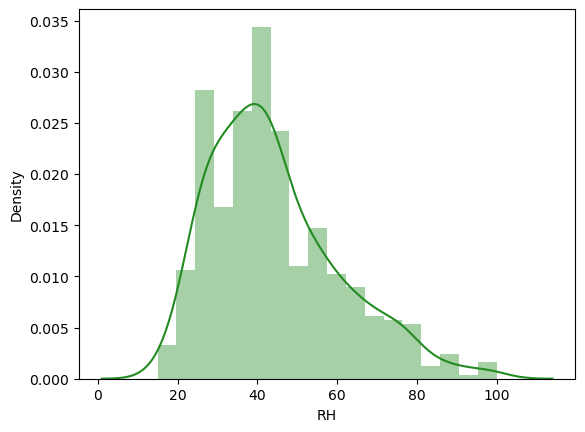

In [12]:
sns.distplot(forest_data['RH'], color = 'forestgreen')
plt.show()

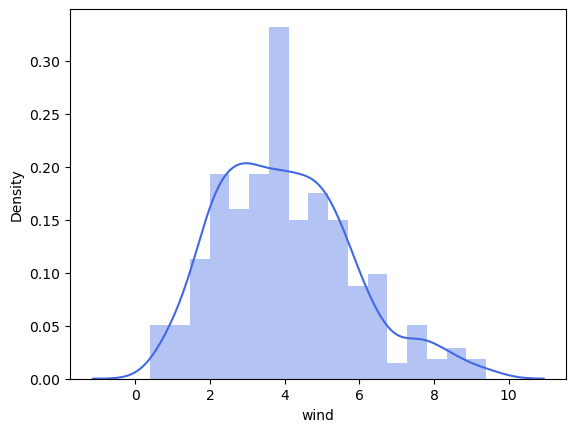

In [13]:
sns.distplot(forest_data['wind'], color = 'royalblue')
plt.show()

### Label Encoding the size of Categorical Column:-

In [14]:
forest_data.loc[forest_data.size_category=='small','size_category']=0
forest_data.loc[forest_data.size_category=='large','size_category']=1
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Dropping the Unwanted Columns:-

In [15]:
forest_data.drop(['month','day'],axis=1,inplace=True)
forest_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting the Independent and Dependent Variables:-

In [16]:
x=forest_data.iloc[:,:-1]
y=forest_data.iloc[:,-1]
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: object

In [18]:
y=y.astype('float')

## Using Standard Scalar from sklearn.preprocessing.

In [20]:
ss=preprocessing.StandardScaler()
x=ss.fit_transform(x)

### Building the Model:-

In [21]:
model=Sequential()
model.add(Dense(28,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

### Compile the Model:-

In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Fit the Model:-

In [23]:
history=model.fit(x,y,validation_split=0.03,epochs=250,batch_size=50)

Epoch 1/250
11/11 [==============================] - 2s 18ms/step - loss: 0.7698 - accuracy: 0.4491 - val_loss: 0.7449 - val_accuracy: 0.4375
Epoch 2/250
11/11 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5609 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 3/250
11/11 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.6447 - val_loss: 0.6512 - val_accuracy: 0.5000
Epoch 4/250
11/11 [==============================] - 0s 4ms/step - loss: 0.6131 - accuracy: 0.7066 - val_loss: 0.6342 - val_accuracy: 0.5625
Epoch 5/250
11/11 [==============================] - 0s 3ms/step - loss: 0.5931 - accuracy: 0.7385 - val_loss: 0.6281 - val_accuracy: 0.5625
Epoch 6/250
11/11 [==============================] - 0s 4ms/step - loss: 0.5782 - accuracy: 0.7365 - val_loss: 0.6257 - val_accuracy: 0.6875
Epoch 7/250
11/11 [==============================] - 0s 4ms/step - loss: 0.5677 - accuracy: 0.7425 - val_loss: 0.6219 - val_accuracy: 0.7500
Epoch 8/250


Epoch 59/250
11/11 [==============================] - 0s 4ms/step - loss: 0.3396 - accuracy: 0.8403 - val_loss: 0.6215 - val_accuracy: 0.7500
Epoch 60/250
11/11 [==============================] - 0s 4ms/step - loss: 0.3353 - accuracy: 0.8443 - val_loss: 0.6343 - val_accuracy: 0.7500
Epoch 61/250
11/11 [==============================] - 0s 3ms/step - loss: 0.3303 - accuracy: 0.8463 - val_loss: 0.6372 - val_accuracy: 0.7500
Epoch 62/250
11/11 [==============================] - 0s 3ms/step - loss: 0.3245 - accuracy: 0.8503 - val_loss: 0.6270 - val_accuracy: 0.8125
Epoch 63/250
11/11 [==============================] - 0s 3ms/step - loss: 0.3207 - accuracy: 0.8663 - val_loss: 0.5835 - val_accuracy: 0.8125
Epoch 64/250
11/11 [==============================] - 0s 3ms/step - loss: 0.3221 - accuracy: 0.8583 - val_loss: 0.5877 - val_accuracy: 0.8125
Epoch 65/250
11/11 [==============================] - 0s 4ms/step - loss: 0.3152 - accuracy: 0.8583 - val_loss: 0.5884 - val_accuracy: 0.8125
Epoch 

11/11 [==============================] - 0s 4ms/step - loss: 0.1414 - accuracy: 0.9521 - val_loss: 0.6661 - val_accuracy: 0.8750
Epoch 117/250
11/11 [==============================] - 0s 3ms/step - loss: 0.1379 - accuracy: 0.9521 - val_loss: 0.6739 - val_accuracy: 0.8750
Epoch 118/250
11/11 [==============================] - 0s 4ms/step - loss: 0.1354 - accuracy: 0.9481 - val_loss: 0.6779 - val_accuracy: 0.8750
Epoch 119/250
11/11 [==============================] - 0s 4ms/step - loss: 0.1326 - accuracy: 0.9501 - val_loss: 0.6785 - val_accuracy: 0.8750
Epoch 120/250
11/11 [==============================] - 0s 4ms/step - loss: 0.1296 - accuracy: 0.9501 - val_loss: 0.6795 - val_accuracy: 0.8750
Epoch 121/250
11/11 [==============================] - 0s 3ms/step - loss: 0.1273 - accuracy: 0.9521 - val_loss: 0.6706 - val_accuracy: 0.8750
Epoch 122/250
11/11 [==============================] - 0s 4ms/step - loss: 0.1246 - accuracy: 0.9581 - val_loss: 0.6767 - val_accuracy: 0.8750
Epoch 123/250

11/11 [==============================] - 0s 4ms/step - loss: 0.0520 - accuracy: 0.9940 - val_loss: 0.8631 - val_accuracy: 0.8750
Epoch 174/250
11/11 [==============================] - 0s 4ms/step - loss: 0.0512 - accuracy: 0.9940 - val_loss: 0.8672 - val_accuracy: 0.8750
Epoch 175/250
11/11 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9920 - val_loss: 0.8743 - val_accuracy: 0.8750
Epoch 176/250
11/11 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9920 - val_loss: 0.8774 - val_accuracy: 0.8750
Epoch 177/250
11/11 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9920 - val_loss: 0.8774 - val_accuracy: 0.8750
Epoch 178/250
11/11 [==============================] - 0s 4ms/step - loss: 0.0478 - accuracy: 0.9920 - val_loss: 0.8835 - val_accuracy: 0.8750
Epoch 179/250
11/11 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9980 - val_loss: 0.8925 - val_accuracy: 0.8750
Epoch 180/250

11/11 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 1.0092 - val_accuracy: 0.8750
Epoch 231/250
11/11 [==============================] - 0s 4ms/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 1.0143 - val_accuracy: 0.8750
Epoch 232/250
11/11 [==============================] - 0s 6ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 1.0169 - val_accuracy: 0.8750
Epoch 233/250
11/11 [==============================] - 0s 4ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 1.0245 - val_accuracy: 0.8750
Epoch 234/250
11/11 [==============================] - 0s 4ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 1.0467 - val_accuracy: 0.8750
Epoch 235/250
11/11 [==============================] - 0s 5ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 1.0596 - val_accuracy: 0.8750
Epoch 236/250
11/11 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 1.0574 - val_accuracy: 0.8750
Epoch 237/250

In [24]:
scores=model.evaluate(x,y)
print(scores)

17/17 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 0.9961
[0.049940694123506546, 0.9961315393447876]


### Plotting on the graph of data :-

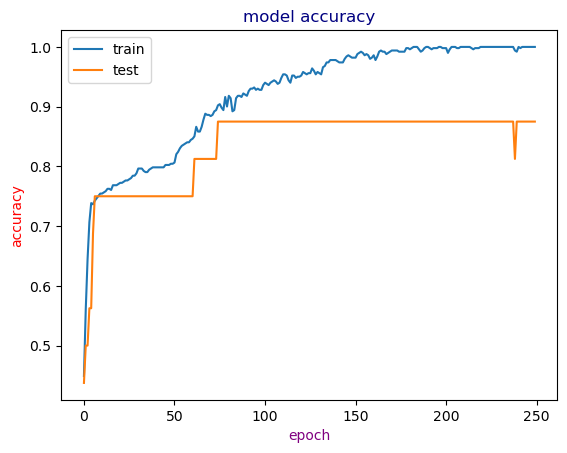

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy', color = 'navy')
plt.ylabel('accuracy', color = 'red')
plt.xlabel('epoch', color = 'purple')
plt.legend(['train','test'],loc='upper left',)
plt.show()

## Building a New Model:-

In [32]:
model1=Sequential()
model1.add(Dense(28,activation='relu'))
model.add(Dense(14,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [33]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history=model1.fit(x,y,validation_split=0.33,epochs=250,batch_size=50)

Epoch 1/250
7/7 [==============================] - 0s 17ms/step - loss: 0.7743 - accuracy: 0.5173 - val_loss: 0.7629 - val_accuracy: 0.4971
Epoch 2/250
7/7 [==============================] - 0s 7ms/step - loss: 0.7154 - accuracy: 0.5578 - val_loss: 0.7318 - val_accuracy: 0.4971
Epoch 3/250
7/7 [==============================] - 0s 8ms/step - loss: 0.6690 - accuracy: 0.6040 - val_loss: 0.7058 - val_accuracy: 0.5556
Epoch 4/250
7/7 [==============================] - 0s 7ms/step - loss: 0.6291 - accuracy: 0.6532 - val_loss: 0.6861 - val_accuracy: 0.6199
Epoch 5/250
7/7 [==============================] - 0s 7ms/step - loss: 0.5957 - accuracy: 0.6965 - val_loss: 0.6723 - val_accuracy: 0.6491
Epoch 6/250
7/7 [==============================] - 0s 7ms/step - loss: 0.5685 - accuracy: 0.7341 - val_loss: 0.6633 - val_accuracy: 0.6959
Epoch 7/250
7/7 [==============================] - 0s 7ms/step - loss: 0.5459 - accuracy: 0.7514 - val_loss: 0.6581 - val_accuracy: 0.6784
Epoch 8/250
7/7 [=========

7/7 [==============================] - 0s 7ms/step - loss: 0.3285 - accuracy: 0.8555 - val_loss: 0.6908 - val_accuracy: 0.7310
Epoch 60/250
7/7 [==============================] - 0s 7ms/step - loss: 0.3262 - accuracy: 0.8584 - val_loss: 0.6913 - val_accuracy: 0.7310
Epoch 61/250
7/7 [==============================] - 0s 7ms/step - loss: 0.3238 - accuracy: 0.8613 - val_loss: 0.6921 - val_accuracy: 0.7310
Epoch 62/250
7/7 [==============================] - 0s 5ms/step - loss: 0.3216 - accuracy: 0.8699 - val_loss: 0.6932 - val_accuracy: 0.7310
Epoch 63/250
7/7 [==============================] - 0s 7ms/step - loss: 0.3192 - accuracy: 0.8786 - val_loss: 0.6938 - val_accuracy: 0.7310
Epoch 64/250
7/7 [==============================] - 0s 5ms/step - loss: 0.3170 - accuracy: 0.8728 - val_loss: 0.6947 - val_accuracy: 0.7310
Epoch 65/250
7/7 [==============================] - 0s 5ms/step - loss: 0.3145 - accuracy: 0.8728 - val_loss: 0.6955 - val_accuracy: 0.7310
Epoch 66/250
7/7 [===============

7/7 [==============================] - 0s 5ms/step - loss: 0.2157 - accuracy: 0.9277 - val_loss: 0.7433 - val_accuracy: 0.7602
Epoch 118/250
7/7 [==============================] - 0s 7ms/step - loss: 0.2141 - accuracy: 0.9277 - val_loss: 0.7451 - val_accuracy: 0.7544
Epoch 119/250
7/7 [==============================] - 0s 5ms/step - loss: 0.2123 - accuracy: 0.9277 - val_loss: 0.7458 - val_accuracy: 0.7544
Epoch 120/250
7/7 [==============================] - 0s 5ms/step - loss: 0.2107 - accuracy: 0.9306 - val_loss: 0.7476 - val_accuracy: 0.7485
Epoch 121/250
7/7 [==============================] - 0s 7ms/step - loss: 0.2093 - accuracy: 0.9277 - val_loss: 0.7483 - val_accuracy: 0.7485
Epoch 122/250
7/7 [==============================] - 0s 7ms/step - loss: 0.2079 - accuracy: 0.9306 - val_loss: 0.7489 - val_accuracy: 0.7485
Epoch 123/250
7/7 [==============================] - 0s 5ms/step - loss: 0.2061 - accuracy: 0.9335 - val_loss: 0.7503 - val_accuracy: 0.7485
Epoch 124/250
7/7 [========

7/7 [==============================] - 0s 4ms/step - loss: 0.1428 - accuracy: 0.9566 - val_loss: 0.8126 - val_accuracy: 0.7778
Epoch 176/250
7/7 [==============================] - 0s 5ms/step - loss: 0.1419 - accuracy: 0.9595 - val_loss: 0.8144 - val_accuracy: 0.7895
Epoch 177/250
7/7 [==============================] - 0s 4ms/step - loss: 0.1406 - accuracy: 0.9624 - val_loss: 0.8152 - val_accuracy: 0.7895
Epoch 178/250
7/7 [==============================] - 0s 5ms/step - loss: 0.1398 - accuracy: 0.9653 - val_loss: 0.8157 - val_accuracy: 0.7895
Epoch 179/250
7/7 [==============================] - 0s 5ms/step - loss: 0.1386 - accuracy: 0.9653 - val_loss: 0.8165 - val_accuracy: 0.7836
Epoch 180/250
7/7 [==============================] - 0s 5ms/step - loss: 0.1380 - accuracy: 0.9653 - val_loss: 0.8184 - val_accuracy: 0.7836
Epoch 181/250
7/7 [==============================] - 0s 5ms/step - loss: 0.1370 - accuracy: 0.9653 - val_loss: 0.8183 - val_accuracy: 0.7895
Epoch 182/250
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.0963 - accuracy: 0.9769 - val_loss: 0.8778 - val_accuracy: 0.7895
Epoch 234/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0957 - accuracy: 0.9769 - val_loss: 0.8807 - val_accuracy: 0.7895
Epoch 235/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0952 - accuracy: 0.9769 - val_loss: 0.8828 - val_accuracy: 0.7836
Epoch 236/250
7/7 [==============================] - 0s 8ms/step - loss: 0.0948 - accuracy: 0.9769 - val_loss: 0.8825 - val_accuracy: 0.7953
Epoch 237/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0942 - accuracy: 0.9769 - val_loss: 0.8849 - val_accuracy: 0.7778
Epoch 238/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0935 - accuracy: 0.9769 - val_loss: 0.8837 - val_accuracy: 0.7836
Epoch 239/250
7/7 [==============================] - 0s 5ms/step - loss: 0.0928 - accuracy: 0.9769 - val_loss: 0.8847 - val_accuracy: 0.7895
Epoch 240/250
7/7 [========

In [35]:
scores=model1.evaluate(x,y)
print(scores)

17/17 [==============================] - 0s 1ms/step - loss: 0.3555 - accuracy: 0.9188
[0.3555193245410919, 0.9187620878219604]


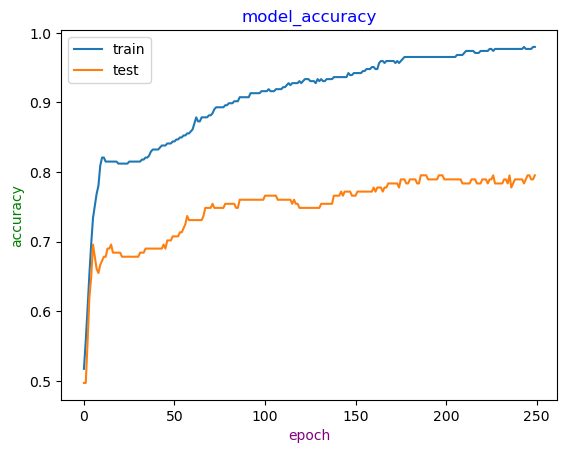

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy',color = 'blue')
plt.ylabel('accuracy', color = 'green')
plt.xlabel('epoch', color = 'purple')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [37]:
forest_data.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

### Dropping 'day' Dummy Columns:-

In [38]:
x=forest_data.drop(['dayfri','daymon','daysat','daysun','daythu','daywed','size_category'],axis=1)
y=y=forest_data.iloc[:,-1]
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,daytue,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


## Building a Model with New Data:-

In [39]:
ss=preprocessing.StandardScaler()
x=ss.fit_transform(x)
y=y.astype('float')
model2=Sequential()
model2.add(Dense(21,activation='relu'))
model2.add(Dense(15,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

In [40]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
history=model2.fit(x,y,validation_split=0.33,epochs=250,batch_size=50)

Epoch 1/250
7/7 [==============================] - 0s 17ms/step - loss: 0.6219 - accuracy: 0.7283 - val_loss: 0.7035 - val_accuracy: 0.6725
Epoch 2/250
7/7 [==============================] - 0s 4ms/step - loss: 0.5984 - accuracy: 0.7514 - val_loss: 0.7038 - val_accuracy: 0.6784
Epoch 3/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5816 - accuracy: 0.7572 - val_loss: 0.7044 - val_accuracy: 0.6784
Epoch 4/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5661 - accuracy: 0.7543 - val_loss: 0.7050 - val_accuracy: 0.6784
Epoch 5/250
7/7 [==============================] - 0s 7ms/step - loss: 0.5522 - accuracy: 0.7572 - val_loss: 0.7053 - val_accuracy: 0.6784
Epoch 6/250
7/7 [==============================] - 0s 7ms/step - loss: 0.5403 - accuracy: 0.7572 - val_loss: 0.7059 - val_accuracy: 0.6784
Epoch 7/250
7/7 [==============================] - 0s 5ms/step - loss: 0.5297 - accuracy: 0.7572 - val_loss: 0.7067 - val_accuracy: 0.6784
Epoch 8/250
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 0.2891 - accuracy: 0.8757 - val_loss: 0.7031 - val_accuracy: 0.7368
Epoch 60/250
7/7 [==============================] - 0s 8ms/step - loss: 0.2850 - accuracy: 0.8786 - val_loss: 0.7059 - val_accuracy: 0.7427
Epoch 61/250
7/7 [==============================] - 0s 5ms/step - loss: 0.2813 - accuracy: 0.8815 - val_loss: 0.7068 - val_accuracy: 0.7368
Epoch 62/250
7/7 [==============================] - 0s 5ms/step - loss: 0.2770 - accuracy: 0.8815 - val_loss: 0.7091 - val_accuracy: 0.7368
Epoch 63/250
7/7 [==============================] - 0s 7ms/step - loss: 0.2719 - accuracy: 0.8815 - val_loss: 0.7088 - val_accuracy: 0.7368
Epoch 64/250
7/7 [==============================] - 0s 5ms/step - loss: 0.2682 - accuracy: 0.8902 - val_loss: 0.7091 - val_accuracy: 0.7368
Epoch 65/250
7/7 [==============================] - 0s 5ms/step - loss: 0.2647 - accuracy: 0.8902 - val_loss: 0.7113 - val_accuracy: 0.7427
Epoch 66/250
7/7 [===============

7/7 [==============================] - 0s 5ms/step - loss: 0.1000 - accuracy: 0.9740 - val_loss: 0.8551 - val_accuracy: 0.8480
Epoch 118/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0980 - accuracy: 0.9711 - val_loss: 0.8582 - val_accuracy: 0.8421
Epoch 119/250
7/7 [==============================] - 0s 5ms/step - loss: 0.0958 - accuracy: 0.9682 - val_loss: 0.8638 - val_accuracy: 0.8538
Epoch 120/250
7/7 [==============================] - 0s 5ms/step - loss: 0.0944 - accuracy: 0.9682 - val_loss: 0.8674 - val_accuracy: 0.8480
Epoch 121/250
7/7 [==============================] - 0s 4ms/step - loss: 0.0928 - accuracy: 0.9682 - val_loss: 0.8751 - val_accuracy: 0.8480
Epoch 122/250
7/7 [==============================] - 0s 5ms/step - loss: 0.0915 - accuracy: 0.9682 - val_loss: 0.8761 - val_accuracy: 0.8421
Epoch 123/250
7/7 [==============================] - 0s 5ms/step - loss: 0.0889 - accuracy: 0.9682 - val_loss: 0.8869 - val_accuracy: 0.8538
Epoch 124/250
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 0.0357 - accuracy: 1.0000 - val_loss: 1.1393 - val_accuracy: 0.8830
Epoch 176/250
7/7 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 1.1455 - val_accuracy: 0.8830
Epoch 177/250
7/7 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 1.0000 - val_loss: 1.1494 - val_accuracy: 0.8830
Epoch 178/250
7/7 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9971 - val_loss: 1.1544 - val_accuracy: 0.8830
Epoch 179/250
7/7 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 1.1613 - val_accuracy: 0.8889
Epoch 180/250
7/7 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 1.0000 - val_loss: 1.1633 - val_accuracy: 0.8830
Epoch 181/250
7/7 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 1.1703 - val_accuracy: 0.8830
Epoch 182/250
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 1.3771 - val_accuracy: 0.8830
Epoch 234/250
7/7 [==============================] - 0s 8ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 1.3822 - val_accuracy: 0.8772
Epoch 235/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 1.3876 - val_accuracy: 0.8713
Epoch 236/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 1.3890 - val_accuracy: 0.8713
Epoch 237/250
7/7 [==============================] - 0s 5ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 1.3946 - val_accuracy: 0.8713
Epoch 238/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 1.3966 - val_accuracy: 0.8713
Epoch 239/250
7/7 [==============================] - 0s 7ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 1.3993 - val_accuracy: 0.8772
Epoch 240/250
7/7 [========

#### The model2 Accuracy is better.

### Plotting the graph of new data:-

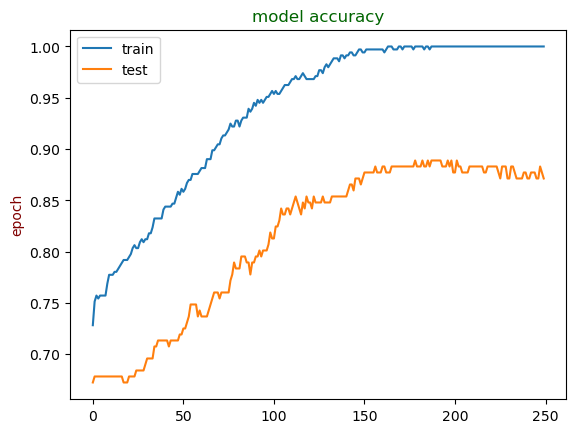

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy', color = 'darkgreen')
plt.ylabel('epoch', color = 'maroon')
plt.legend(['train','test'],loc='upper left')
plt.show()